# Studying the effects of reddit chatter on the VIX

## Load the data

In [188]:
import numpy as np
import pandas as pd

# Useful function for reducing memory usage of a dataframe (found it on the interwebs!)
def reduce_memory(df):
    """Reduce memory usage of a dataframe by setting data types. """
    #start_mem = df.memory_usage().sum() / 1024 ** 2
    #print('Initial df memory usage is {:.2f} MB for {} columns'
    #      .format(start_mem, len(df.columns)))

    for col in df.columns:
        col_type = df[col].dtypes
        if col_type != object:
            cmin = df[col].min()
            cmax = df[col].max()
            if str(col_type)[:3] == 'int':
                # Can use unsigned int here too
                if cmin > np.iinfo(np.int8).min and cmax < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif cmin > np.iinfo(np.int16).min and cmax < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif cmin > np.iinfo(np.int32).min and cmax < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif cmin > np.iinfo(np.int64).min and cmax < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if cmin > np.finfo(np.float16).min and cmax < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif cmin > np.finfo(np.float32).min and cmax < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    #end_mem = df.memory_usage().sum() / 1024 ** 2
    #memory_reduction = 100 * (start_mem - end_mem) / start_mem
    #print('Final memory usage is: {:.2f} MB - decreased by {:.1f}%'.format(end_mem, memory_reduction))
    return df

In [132]:
import yfinance as yf

vix = yf.Ticker('^VIX')
vix_df = vix.history(start="2021-01-01", end="2021-12-31", interval="1d")

In [133]:
vix_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-31,22.990000,23.250000,21.240000,22.750000,0,0,0
2021-01-04,23.040001,29.190001,22.559999,26.969999,0,0,0
2021-01-05,26.940001,28.600000,24.799999,25.340000,0,0,0
2021-01-06,25.480000,26.770000,22.139999,25.070000,0,0,0
2021-01-07,23.670000,23.910000,22.250000,22.370001,0,0,0
...,...,...,...,...,...,...,...
2021-12-23,18.809999,18.930000,17.620001,17.959999,0,0,0
2021-12-27,19.370001,19.410000,17.549999,17.680000,0,0,0
2021-12-28,17.780001,18.469999,17.510000,17.540001,0,0,0


In [187]:
import os

data_finance = pd.DataFrame()

# data from https://www.kaggle.com/datasets/leukipp/reddit-finance-data
for (dirpath, dirnames, filenames) in os.walk('./data'):
    if dirpath != './data':
        file = '{}/submissions_reddit.csv'.format(dirpath)
        print()
        df = reduce_memory(pd.read_csv(file))
        data_finance = pd.concat([data_finance, df])
        del(df)

,id,author,created,retrieved,edited,pinned,archived,locked,removed,deleted,...,link_flair_text,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,thumbnail,shortlink
0,ko3ecd,bighlovd,2021-01-01 02:33:23,2021-02-04 06:28:30,1970-01-01 00:00:00,0,0,0,1,0,...,None,0.500000,0,0,0,0,0,NaN,default,https://redd.it/ko3ecd
1,ko4jed,naturalhighguy,2021-01-01 03:56:40,2021-02-04 06:28:30,1970-01-01 00:00:00,0,0,0,1,0,...,None,0.379883,0,0,0,11,0,NaN,default,https://redd.it/ko4jed
2,ko65fk,Venky2310,2021-01-01 05:55:12,2021-02-04 06:28:30,1970-01-01 00:00:00,0,0,0,1,0,...,None,1.000000,1,0,0,0,0,NaN,default,https://redd.it/ko65fk
3,koaw8g,[deleted],2021-01-01 12:57:48,2021-02-04 06:28:30,1970-01-01 00:00:00,0,0,0,1,1,...,None,1.000000,1,0,0,0,0,[deleted],default,https://redd.it/koaw8g
4,kobbka,fintechinshorts,2021-01-01 13:31:53,2021-02-04 06:28:30,1970-01-01 00:00:00,0,0,0,1,0,...,None,1.000000,1,0,0,0,0,NaN,default,https://redd.it/kobbka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775321,rt6e7q,[deleted],2021-12-31 23:44:10,2022-01-01 03:56:58,1970-01-01 00:00:00,0,0,0,1,0,...,Discussion,1.000000,1,0,0,1,0,[removed],default,https://redd.it/rt6e7q
775322,rt6frk,Hychro617,2021-12-31 23:46:35,2022-01-01 03:56:58,1970-01-01 00:00:00,0,0,0,1,0,...,YOLO,1.000000,1,0,0,1,0,[removed],self,https://redd.it/rt6frk
775323,rt6kgr,Lambaline,2021-12-31 23:53:41,2022-01-01 03:56:58,1970-01-01 00:00:00,0,0,0,1,0,...,Loss,1.000000,2,0,0,3,0,NaN,https://b.thumbs.redditmedia.com/TtUVXN1XpoXXu...,https://redd.it/rt6kgr
775324,rt6kvg,[deleted],2021-12-31 23:54:17,2022-01-01 03:56:58,1970-01-01 00:00:00,0,0,0,1,1,...,Discussion,1.000000,1,0,0,1,0,[deleted],default,https://redd.it/rt6kvg


## Clean up the data

In [189]:
sample = data_finance[(data_finance['is_self'] == 1) & ~data_finance['author'].isin(['[deleted]','WSBVoteBot']) & (data_finance['selftext'] != '[removed]')][['id','author','created', 'title' ,'selftext']]
sample['created'] = pd.to_datetime(sample['created'] )
sample['created'] = sample['created'].dt.strftime('%Y-%m-%d')

In [190]:
sample

,id,author,created,title,selftext
1117,lr0ajx,AutoModerator,2021-02-24,"Moronic Monday - February 24, 2021 - Your Week...",This is your safe place for questions on finan...
1192,m0w2wv,AutoModerator,2021-03-09,"Moronic Monday - March 09, 2021 - Your Weekly ...",This is your safe place for questions on finan...
1358,m5ycbf,AutoModerator,2021-03-16,"Moronic Monday - March 16, 2021 - Your Weekly ...",This is your safe place for questions on finan...
1427,mb3wl2,AutoModerator,2021-03-23,"Moronic Monday - March 23, 2021 - Your Weekly ...",This is your safe place for questions on finan...
1488,mg5ar6,AutoModerator,2021-03-30,"Moronic Monday - March 30, 2021 - Your Weekly ...",This is your safe place for questions on finan...
...,...,...,...,...,...
775120,rsyzmh,CSMATHENGR,2021-12-31,Insights into the recent Pelosi Calls,* The Numbers\n\nhttps://preview.redd.it/rry7t...
775125,rsz5on,ShiftyPaladin,2021-12-31,$VIR play on omicron,"Listen up retards, it's time to take Pally's D..."
775190,rt16lu,Kamikaze_Cash,2021-12-31,Cash in on Pelosi and the CHIPS and FABS Acts,There has been a lot of talk about Nancy Pelo...
775243,rt35kz,AutoModerator,2021-12-31,Year End Discussion Thread for the Year of 2021,Happy New Year Retards!\n\nFrom the WSB mod te...


## Get the number of posts per day

In [191]:
g = sample.groupby(['created']).created.agg(['count'])
g.index.name = 'Date'
g.index = pd.to_datetime(g.index)
g = g.sort_values(by=['Date'])

In [192]:
g['vix'] = vix_df[['Open', 'Close', 'High', 'Low']].mean(axis = 1)
g = g.dropna() 

In [196]:
g['count_pct'] = g['count'].pct_change()
g['vix_pct'] = g['vix'].pct_change()
# apply normalization techniques
for column in ['count_pct', 'vix_pct']:
    g[column] = (g[column] - g[column].mean()) / g[column].std()
g

,count,vix,count_pct,vix_pct
Date,,,,
2021-01-04,444,25.4400,NaN,NaN
2021-01-05,501,26.4200,0.107886,0.535667
2021-01-06,424,24.8650,-0.312208,-0.846811
2021-01-07,403,23.0500,-0.157074,-1.047515
2021-01-08,499,22.1875,0.271465,-0.542454
...,...,...,...,...
2021-12-23,437,18.3300,-0.230707,-1.134566
2021-12-27,514,18.5025,0.179110,0.122379
2021-12-28,540,17.8250,-0.007975,-0.531068


<AxesSubplot:xlabel='Date'>

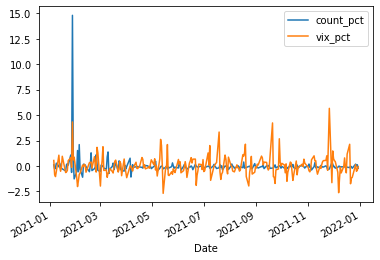

In [197]:
g[['count_pct', 'vix_pct']].plot.line()

## Initial observations
The GME fiasco distorts our dataset. Let's try working on data from 2021-03

<AxesSubplot:xlabel='Date'>

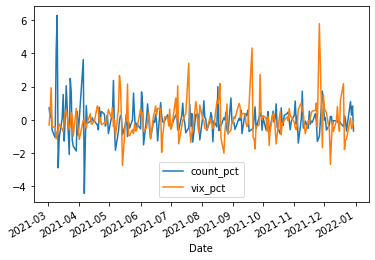

In [200]:
g = g.loc['2021-03-01':]

g['count_pct'] = g['count'].pct_change()
g['vix_pct'] = g['vix'].pct_change()
# apply normalization techniques
for column in ['count_pct', 'vix_pct']:
    g[column] = (g[column] - g[column].mean()) / g[column].std()

g[['count_pct', 'vix_pct']].plot.line()